<a href="https://colab.research.google.com/github/alcideschaux/BURNOUT-CDE/blob/main/BURNOUT_CDE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# --- Configuración ---
file_path = 'BURNOUT-DATA.csv'
total_participants = 28
response_levels = [1, 2, 3, 4, 5]

In [ ]:
# --- Carga de Datos Mejorada ---
try:
    # 1. Leer los textos de los ítems de la PRIMERA fila (índice 0) explícitamente
    #    Usamos header=None para que no intente interpretar la primera fila como encabezado aún.
    df_items_texts_row = pd.read_csv(file_path, header=None, nrows=1)
    #    Convertimos esa fila a una lista. Asumimos que los textos de los ítems
    #    comienzan en la SEGUNDA columna (índice 1) de esa fila.
    item_texts_list = [str(text) for text in df_items_texts_row.iloc[0, 1:].tolist()] # Tomamos desde la segunda columna en adelante

    # Verificar si tenemos 21 textos
    if len(item_texts_list) != 21:
        print(f"Error: Se esperaban 21 textos de ítems en la primera fila (desde la segunda columna), pero se encontraron {len(item_texts_list)}.")
        # Podríamos intentar tomar desde la primera columna si la verificación anterior falla:
        # item_texts_list = [str(text) for text in df_items_texts_row.iloc[0, :].tolist()][:21]
        # if len(item_texts_list) != 21:
        #    print("Error: Tampoco se encontraron 21 textos desde la primera columna.")
        #    exit()
        # else:
        #    print("Advertencia: Se tomaron los textos desde la primera columna de la primera fila.")
        exit() # Salir si no se encuentran 21 textos

    # 2. Leer los datos numéricos comenzando desde la SEGUNDA fila (índice 1),
    #    SIN encabezado interpretado por pandas inicialmente (header=None)
    #    y saltando la primera fila que contenía los textos (skiprows=1).
    df_data = pd.read_csv(file_path, header=None, skiprows=1)

    # 3. Verificar que el DataFrame de datos tenga suficientes columnas (ID + 21 ítems = 22)
    if df_data.shape[1] < 22:
        print(f"Error: Se esperaban al menos 22 columnas en los datos (ID + 21 ítems), pero se encontraron {df_data.shape[1]}.")
        exit()
    # Si hay más de 22 columnas, nos quedamos solo con las primeras 22
    if df_data.shape[1] > 22:
        print(f"Advertencia: Se encontraron más de 22 columnas, se usarán solo las primeras 22.")
        df_data = df_data.iloc[:, :22]

    # 4. Asignar los nombres de columna CORRECTOS:
    #    La primera columna de datos es 'ID'.
    #    Las siguientes 21 columnas de datos corresponden a los textos leídos.
    df_data.columns = ['ID'] + item_texts_list

    # 5. Definir la lista de columnas de ítems que vamos a graficar (todas excepto 'ID')
    item_columns_to_plot = df_data.columns[1:].tolist() # Esto ahora contiene los textos correctos

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{file_path}'. Asegúrate de que la ruta es correcta.")
    exit()
except Exception as e:
    print(f"Error al leer o procesar el archivo: {e}")
    exit()

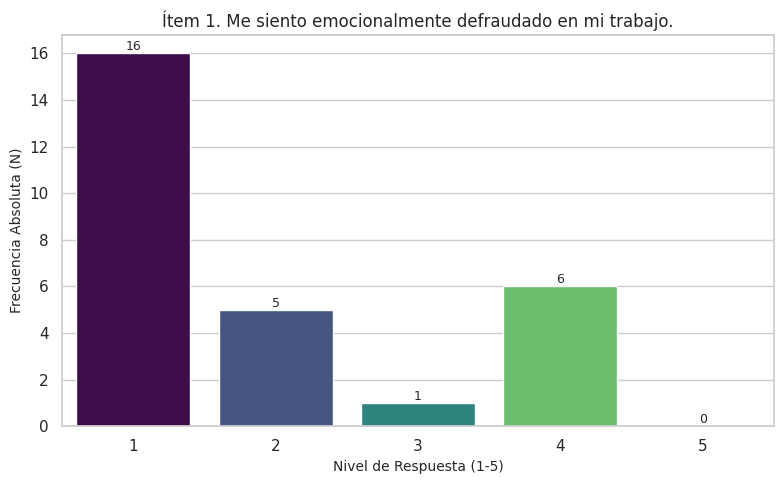

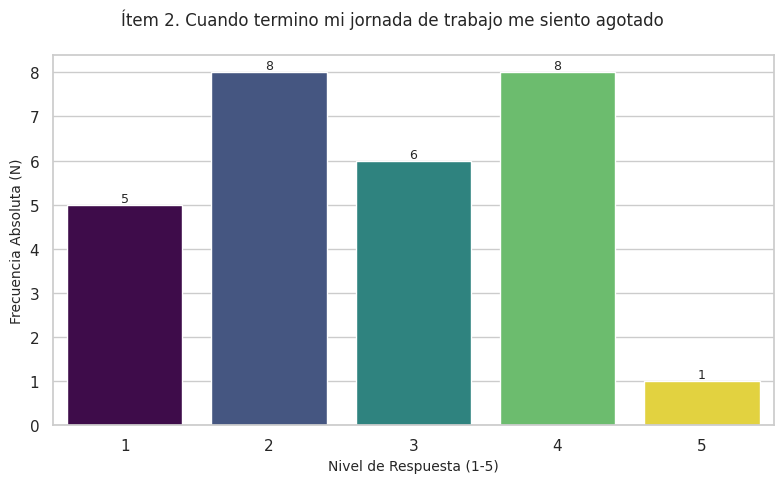

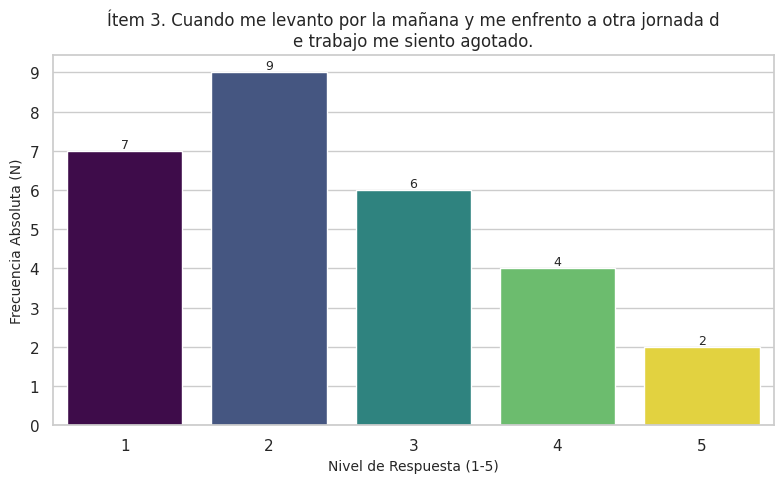

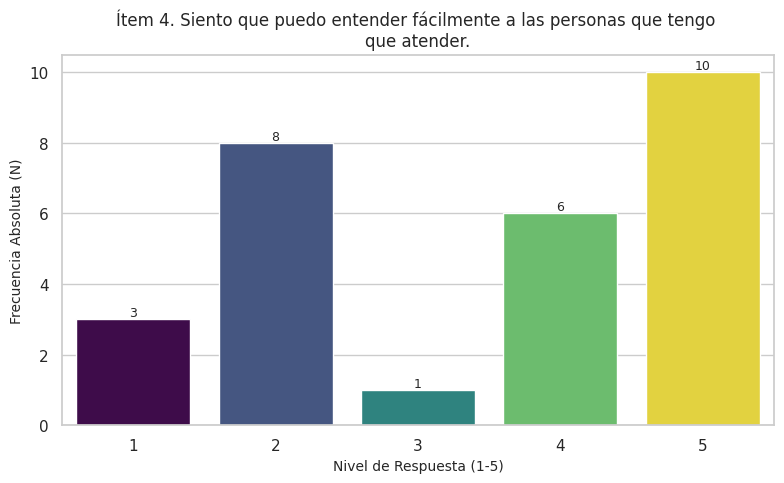

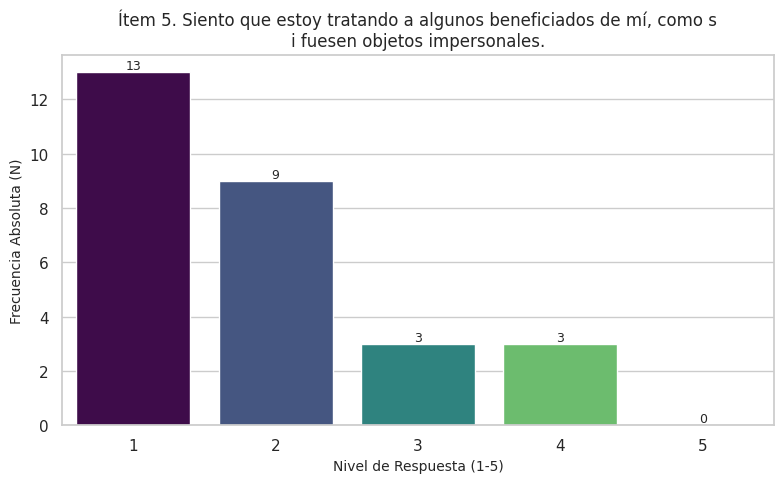

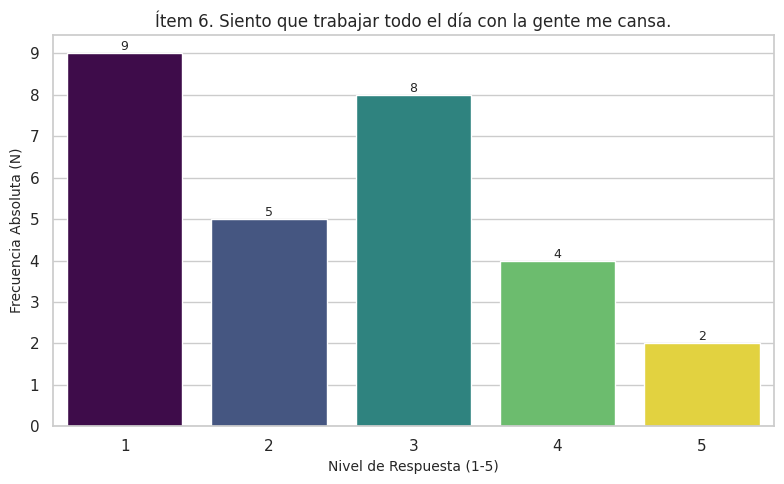

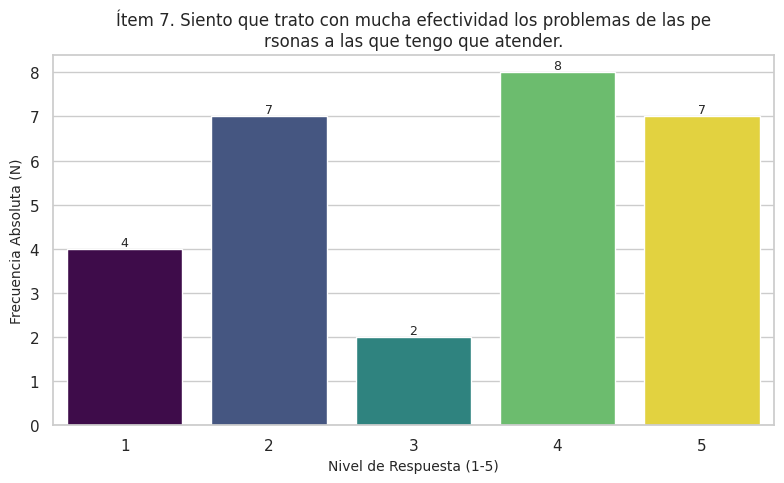

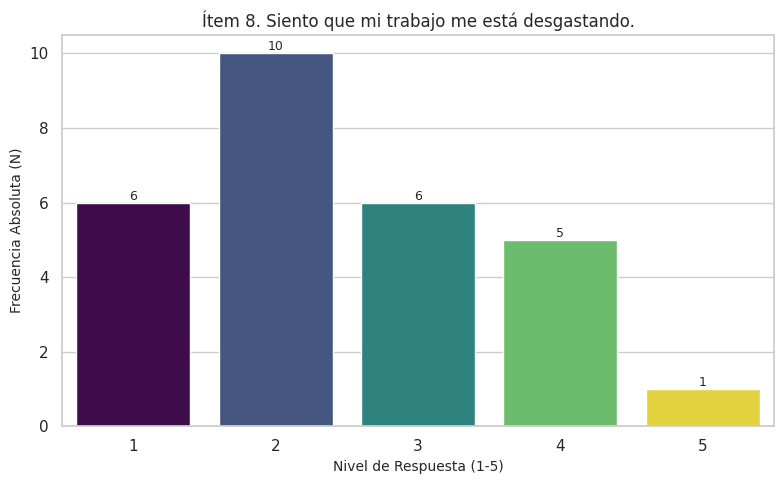

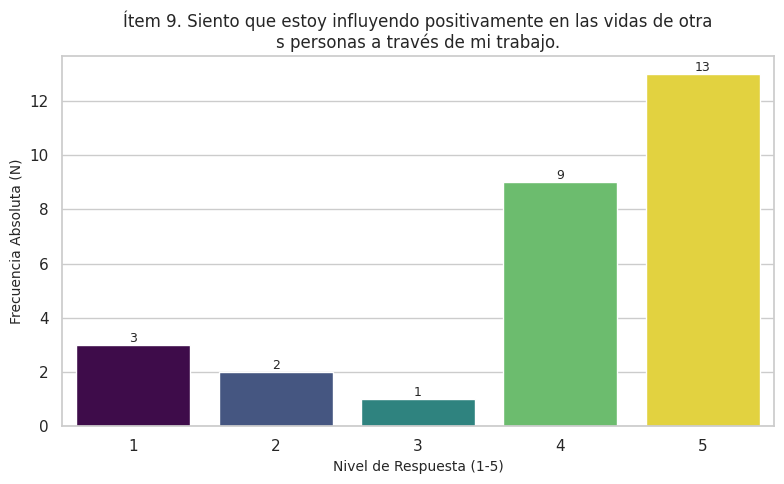

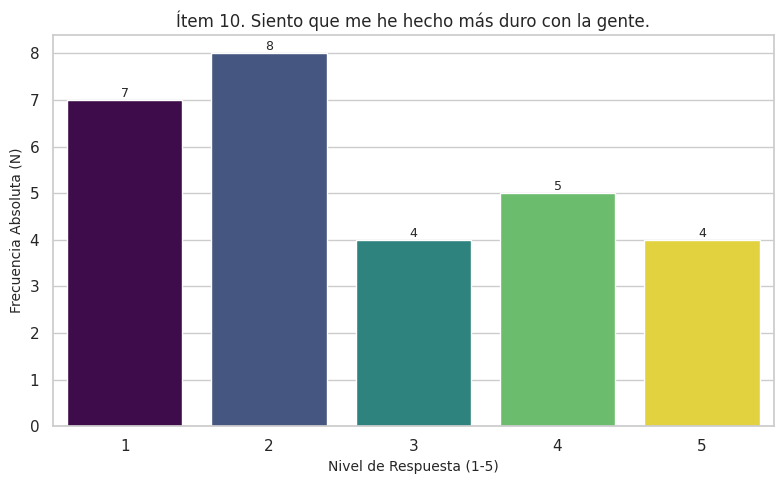

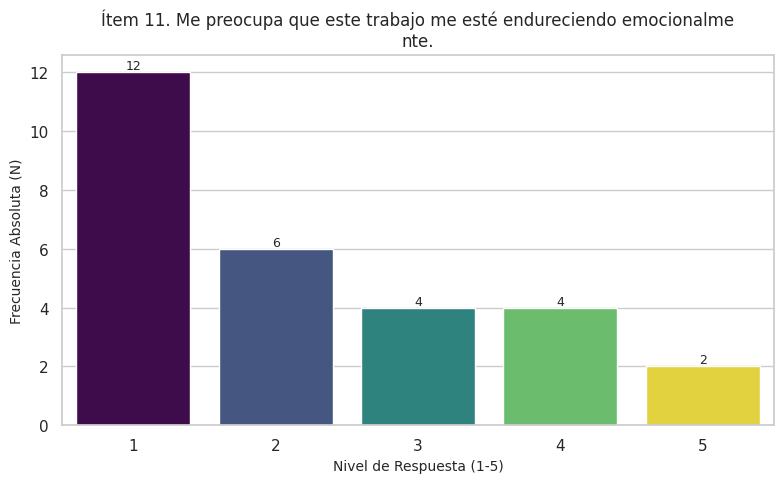

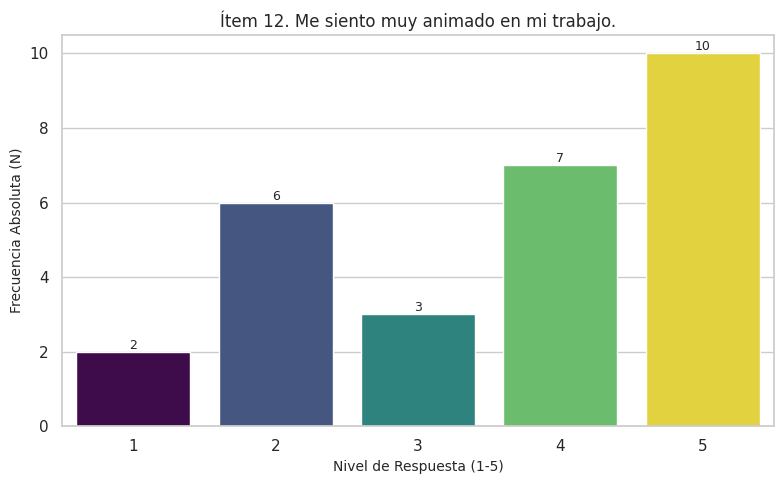

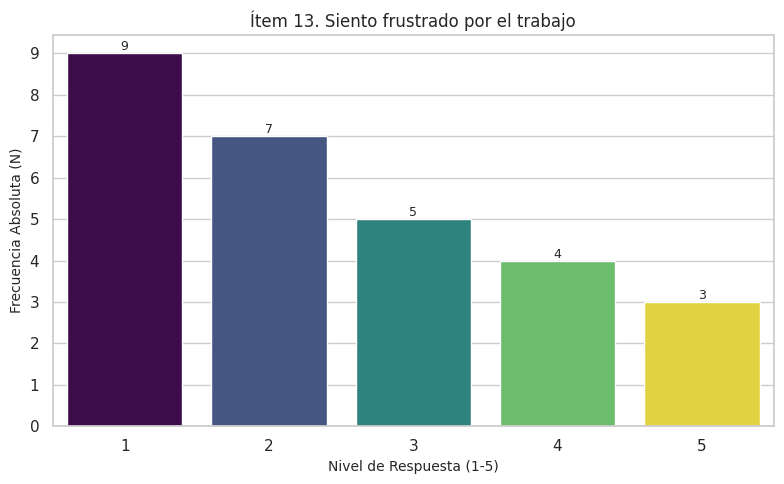

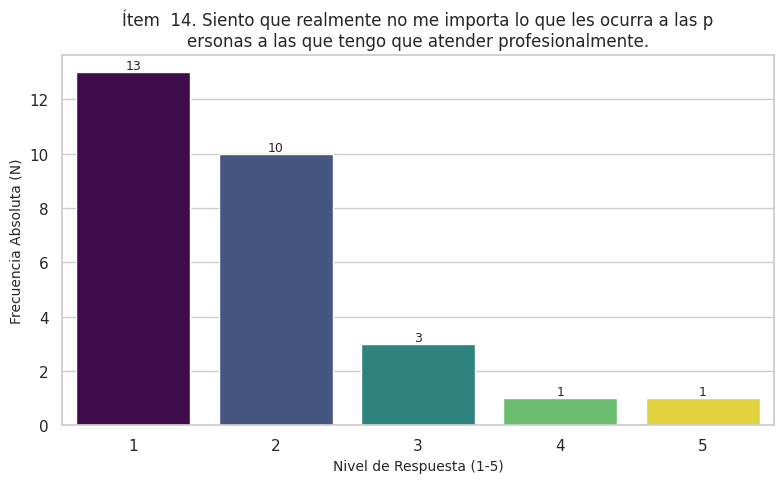

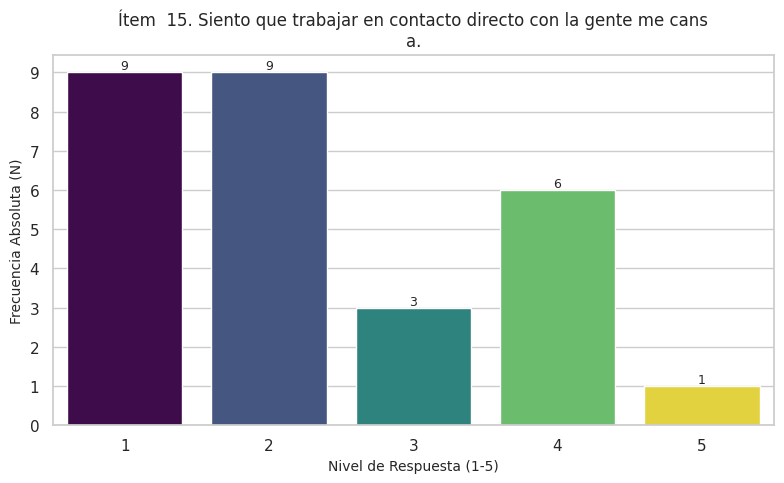

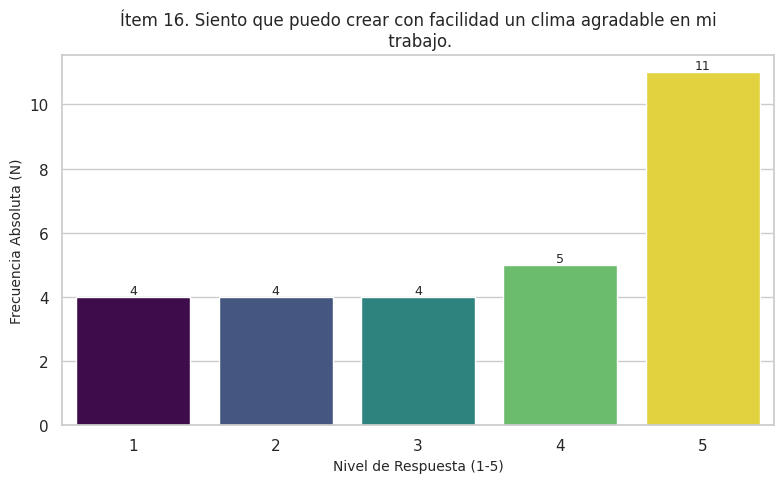

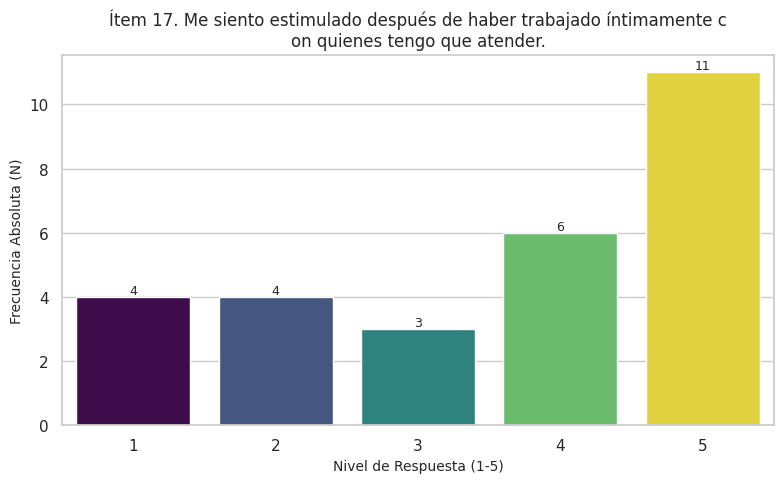

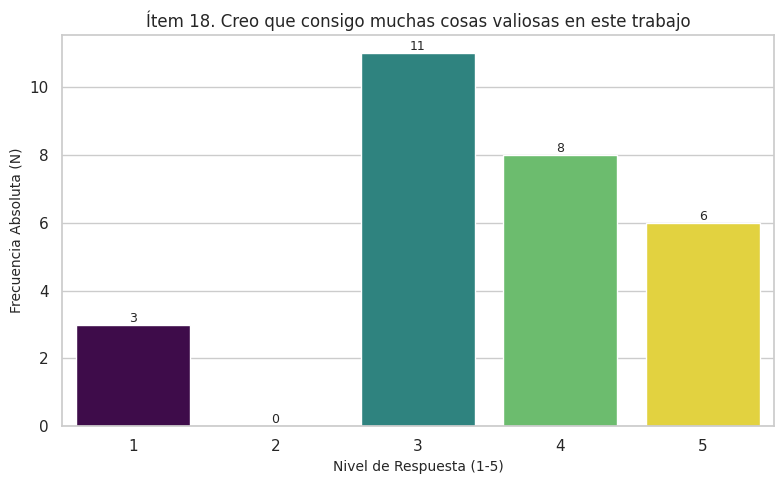

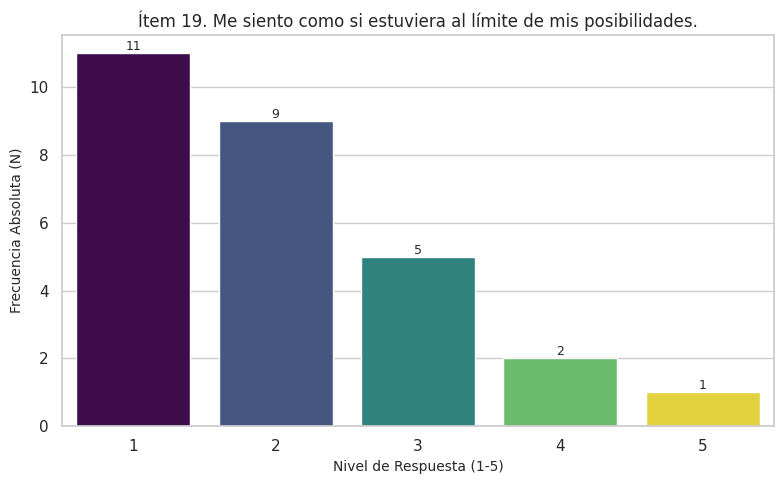

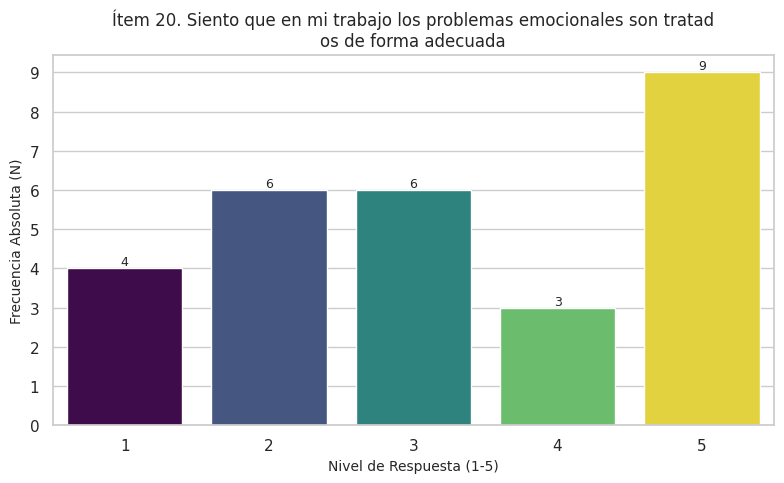

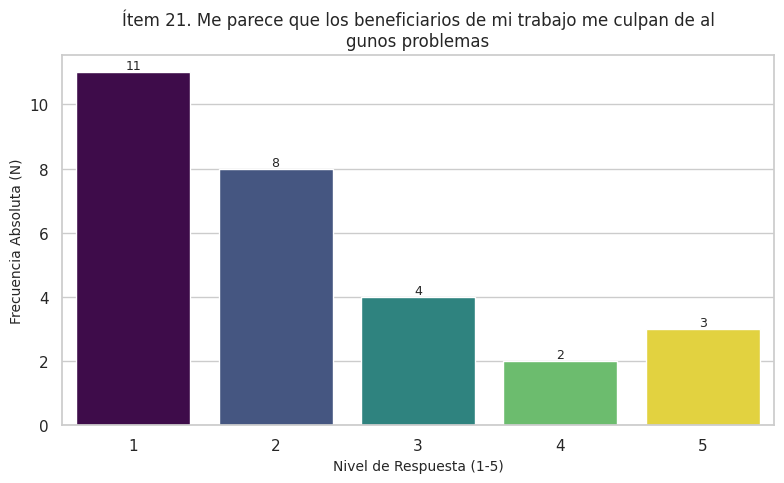


Se han generado 21 gráficos de barras.
Se generó un gráfico para cada uno de los 21 ítems correctamente.


In [ ]:
# --- Generación de Gráficos ---

# Configurar estilo de Seaborn
sns.set_theme(style="whitegrid")

# Iterar sobre cada columna de ítem para generar un gráfico
# Usamos enumerate para obtener el índice (0 a 20) y el nombre de la columna
for i, col_name in enumerate(item_columns_to_plot):

    # Calcular frecuencias absolutas asegurando que todos los niveles estén presentes
    frequencies = df_data[col_name].value_counts().reindex(response_levels, fill_value=0).sort_index()

    # Crear la figura y el eje para el gráfico
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=frequencies.index, y=frequencies.values, hue=frequencies.index, palette="viridis", order=response_levels, legend=False)

    # Añadir títulos y etiquetas
    # El título ahora usa col_name, que debería ser el texto correcto del ítem
    # El índice 'i' va de 0 a 20, así que usamos 'i+1' para numerar de 1 a 21
    title = f"Ítem {col_name}"
    plt.title('\n'.join(title[j:j+70] for j in range(0, len(title), 70)), fontsize=12)
    plt.xlabel("Nivel de Respuesta (1-5)", fontsize=10)
    plt.ylabel("Frecuencia Absoluta (N)", fontsize=10)

    # Asegurar que el eje Y muestre solo números enteros
    ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    # Añadir etiquetas con el valor exacto encima de cada barra
    for container in ax.containers:
        ax.bar_label(container, fontsize=9)

    # Ajustar layout y mostrar gráfico
    plt.tight_layout()
    plt.show()

# Verificar cuántos gráficos se generaron
num_plots = len(item_columns_to_plot)
print(f"\nSe han generado {num_plots} gráficos de barras.")
if num_plots == 21:
    print("Se generó un gráfico para cada uno de los 21 ítems correctamente.")
else:
    print(f"Advertencia: Se generaron {num_plots} gráficos, pero se esperaban 21. Revise los datos y el código.")

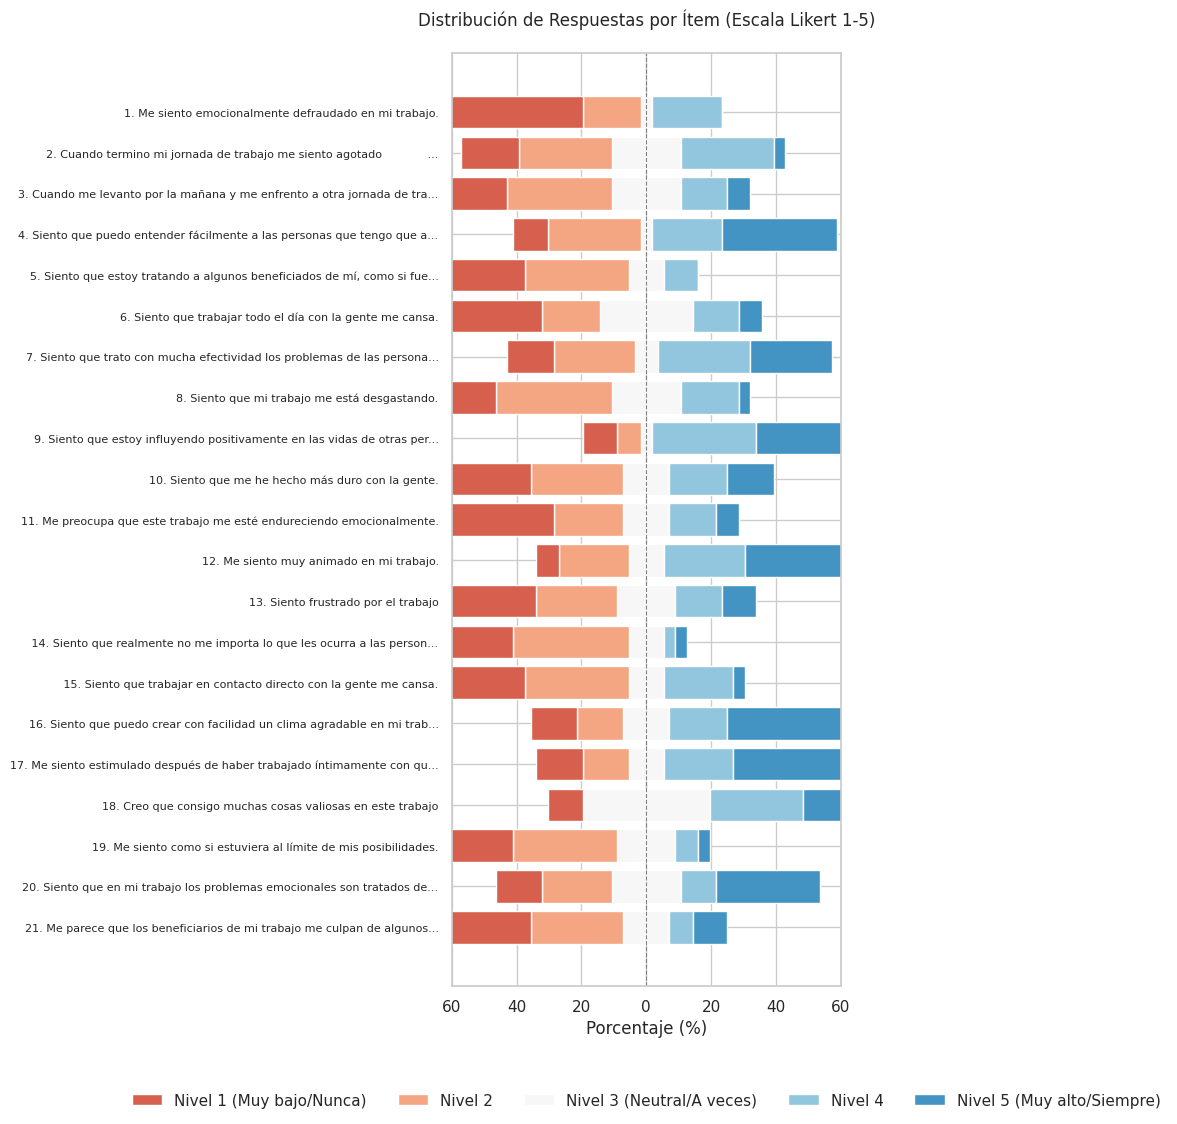

In [ ]:
# file_path = 'BURNOUT-DATA.csv'
total_participants = 28 # N total
response_levels = [1, 2, 3, 4, 5]
# Define etiquetas para la leyenda (ajusta si tu escala significa algo diferente)
response_labels = {
    1: "Nivel 1 (Muy bajo/Nunca)",
    2: "Nivel 2",
    3: "Nivel 3 (Neutral/A veces)",
    4: "Nivel 4",
    5: "Nivel 5 (Muy alto/Siempre)"
}
# Colores (ejemplo de paleta divergente - puedes cambiarla)
# Izquierda (negativo/bajo), Centro, Derecha (positivo/alto)
colors = ['#d6604d', '#f4a582', '#f7f7f7', '#92c5de', '#4393c3']
# O una paleta similar a la imagen ejemplo (marrones a turquesas)
# colors = ['#b38d4f', '#e0c18f', '#f0f0f0', '#a1d9d3', '#5ab4ac']


# --- Carga de Datos (Usando el método robusto anterior) ---
try:
    df_items_texts_row = pd.read_csv(file_path, header=None, nrows=1)
    item_texts_list = [str(text) for text in df_items_texts_row.iloc[0, 1:].tolist()]
    if len(item_texts_list) != 21:
        raise ValueError(f"Se esperaban 21 textos de ítems, se encontraron {len(item_texts_list)}")

    df_data = pd.read_csv(file_path, header=None, skiprows=1)
    if df_data.shape[1] < 22:
        raise ValueError(f"Se esperaban 22 columnas de datos, se encontraron {df_data.shape[1]}")
    if df_data.shape[1] > 22:
        df_data = df_data.iloc[:, :22]

    df_data.columns = ['ID'] + item_texts_list
    item_columns_to_plot = df_data.columns[1:].tolist()

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{file_path}'.")
    exit()
except Exception as e:
    print(f"Error al leer o procesar el archivo: {e}")
    exit()

# --- Preparación de Datos para Gráfico Divergente ---

# 1. Calcular porcentajes para cada ítem y nivel
results = {}
for col_name in item_columns_to_plot:
    counts = df_data[col_name].value_counts().reindex(response_levels, fill_value=0)
    percentages = (counts / total_participants) * 100
    results[col_name] = percentages

# Convertir resultados a DataFrame
df_perc = pd.DataFrame(results).T # Transponer para tener ítems como filas

# Renombrar columnas para claridad (opcional)
df_perc.columns = [f'perc_{level}' for level in response_levels]

# 2. Calcular componentes para el gráfico divergente
# Negativo (izquierda)
df_perc['neg_1'] = df_perc['perc_1']
df_perc['neg_2'] = df_perc['perc_2']
# Neutral (dividido)
df_perc['neu_3_left'] = df_perc['perc_3'] / 2
df_perc['neu_3_right'] = df_perc['perc_3'] / 2
# Positivo (derecha)
df_perc['pos_4'] = df_perc['perc_4']
df_perc['pos_5'] = df_perc['perc_5']

# --- Generación del Gráfico Divergente ---

items = df_perc.index # Nombres de los ítems (eje Y)
y_pos = np.arange(len(items)) # Posiciones en el eje Y

fig, ax = plt.subplots(figsize=(10, 12)) # Ajusta el tamaño según necesites

# Acumuladores para las posiciones 'left' de las barras apiladas
cumulative_left = np.zeros(len(items))
cumulative_right = np.zeros(len(items))

# Plotear barras de izquierda a derecha

# Izquierda (valores negativos)
# Nivel 3 (mitad izquierda) - Graficamos primero para que quede "debajo"
left_vals = -df_perc['neu_3_left'].values
ax.barh(y_pos, left_vals, color=colors[2], edgecolor='white', label=response_labels[3] if 3 in response_labels else 'Nivel 3')
cumulative_left += left_vals
# Nivel 2
left_vals = -df_perc['neg_2'].values
ax.barh(y_pos, left_vals, left=cumulative_left, color=colors[1], edgecolor='white', label=response_labels[2] if 2 in response_labels else 'Nivel 2')
cumulative_left += left_vals
# Nivel 1
left_vals = -df_perc['neg_1'].values
ax.barh(y_pos, left_vals, left=cumulative_left, color=colors[0], edgecolor='white', label=response_labels[1] if 1 in response_labels else 'Nivel 1')

# Derecha (valores positivos)
# Nivel 3 (mitad derecha) - Graficamos primero
right_vals = df_perc['neu_3_right'].values
ax.barh(y_pos, right_vals, color=colors[2], edgecolor='white') # No repetir label
cumulative_right += right_vals
# Nivel 4
right_vals = df_perc['pos_4'].values
ax.barh(y_pos, right_vals, left=cumulative_right, color=colors[3], edgecolor='white', label=response_labels[4] if 4 in response_labels else 'Nivel 4')
cumulative_right += right_vals
# Nivel 5
right_vals = df_perc['pos_5'].values
ax.barh(y_pos, right_vals, left=cumulative_right, color=colors[4], edgecolor='white', label=response_labels[5] if 5 in response_labels else 'Nivel 5')

# --- Formateo del Gráfico ---

# Eje Y (Ítems)
ax.set_yticks(y_pos)
# Truncar textos largos de ítems para que quepan
item_labels_short = [label[:70] + '...' if len(label) > 70 else label for label in items]
ax.set_yticklabels(item_labels_short, fontsize=8)
ax.invert_yaxis() # Mostrar el primer ítem arriba

# Eje X (Porcentaje)
ax.set_xlabel('Porcentaje (%)')
# Establecer límites y ticks para el eje X (ej. -100 a 100)
max_limit = max(abs(cumulative_left).max(), cumulative_right.max())
max_limit = math.ceil(max_limit / 10) * 10 # Redondear al siguiente múltiplo de 10
ax.set_xlim(-max_limit, max_limit)
# Formatear ticks para mostrar como porcentajes positivos en ambos lados
ticks = plt.xticks()[0]
tick_labels = [f'{abs(tick):.0f}' for tick in ticks]
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)

# Línea central en cero
ax.axvline(0, color='grey', linewidth=0.8, linestyle='--')

# Título
ax.set_title('Distribución de Respuestas por Ítem (Escala Likert 1-5)', pad=20)

# Leyenda
# Obtener handles y labels, invertir orden para que coincida con el apilado visual
handles, labels = ax.get_legend_handles_labels()
# Reordenar leyenda para que sea 1, 2, 3, 4, 5
order = [2, 1, 0, 3, 4] # Ajusta este orden según cómo se generaron los labels
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 1]) # Ajustar espacio para leyenda inferior
plt.show()